In [1]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'mypendu:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4827676%2F8160127%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240419%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240419T004513Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db9450a25a4b4b9dd445df4044dc73798408b6424ea287f57b6996e9842297dffe7c22d3fd589d98a8cdb48e44dd7bad999a4c4fb14ef6163b1a3107b4db377248c7e6e5ecaa4e6a9d2f71dd4a602dded581222bebdfd06d3dc130af9a1d831d9a3be951961486c9eb5cdd35e33b3b640f539a540573b35d4a31ead8d99720f23f75f79b2c96f5c5cc5c341d1b27f62327a27f834eb22abd0733ecd029fafbe35717e63ae402a2d197dc918538193f0943a889bae00b8e6eed75b394e8b3e5a3c20ca8c7788ea48ab27df062dff0872ce69358b9706c83d4934db1162c2dcc10dac4bba8ea1fa8d2c726234c47d46bcd192e1f1b6fd0bc7d2000d75a9d4918097'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


# OpenAI Gym Environments
<a id="Environment"></a>

In [2]:
# !pip install gymnasium
# !pip install swig
# !pip install gymnasium[box2d]
# !pip install gymnasium[mujoco]

In [3]:
# %env MUJOCO_GL=egl

In [4]:
# all imports go in here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import random
from itertools import count, cycle
from collections import deque, namedtuple
import timeit
from tqdm import tqdm
from torch.autograd import grad
import mujoco_py
import mujoco
import mediapy as media
import copy

In [5]:
# import os
# os.chdir('/kaggle/input/mypendu')
import mypendu

gym.envs.register(
    id='mypendu1',
    entry_point='mypendu:mypendu1',
)

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particular we will be exploring "Pendulum-v1" , "Hopper-v4", and "Half-Cheetah" environments (https://gymnasium.farama.org/environments/classic_control/ ). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments.

In [6]:
# # Create Inverted Pendulum environment
# #https://gymnasium.farama.org/environments/classic_control/cart_pole/

# env = gym.make('Pendulum-v1', render_mode="rgb_array")
# s = env.reset(seed = 34)
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(20):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, truncated, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
# env.close()

In [113]:


# # Create Hopper environment
# # https://gymnasium.farama.org/environments/mujoco/hopper/


# import gymnasium as gym
# env = gym.make("Humanoid-v4", render_mode = "human")
# s = env.reset(seed = 34)
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(1):
#     # print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         # print(s)
#         a = env.action_space.sample()
#         s, r, done, truncated, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
# env.close()


In [8]:


# # Create Half-Cheetah environment
# # https://gymnasium.farama.org/environments/mujoco/hopper/


# import gymnasium as gym
# env = gym.make("HalfCheetah-v4", render_mode = "rgb_array")
# s = env.reset(seed = 34)
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(1):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, truncated, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
# env.close()


# Hyperparameters
<a id="Hyperparameters"></a>

All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly.

In [9]:
# mention the values of all the hyperparameters (you can add more hyper-paramters as well) to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma = 0.99
noiseScaleRatio = 0.8
minSamples = 25
epochs = 5
tau = 0.1



MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
seeds = [0,1,2,3,4]

# Helper Functions
<a id="helper"></a>

Write all the helper functions that will be used for value-based and policy based algorithms below. In case you want to add more helper functions, please feel free to add.

In [11]:
#Value Network
def createValueNetwork(inDim, outDim, action_size, hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action

    class ValueNetwork(nn.Module):
      def __init__(self,inDim,outDim,hDim,activation):
        super(ValueNetwork,self).__init__()
        self.fc1 = nn.Linear(inDim+action_size,hDim[0])
        self.linear_layers = nn.ModuleList()
        for i in range(len(hDim)-1):
            # if i == 1:
            #     self.linear_layers.append(nn.Linear(hDim[i-1]+action_size, hDim[i]))
            # else:
            self.linear_layers.append(nn.Linear(hDim[i], hDim[i+1]))

        # Output layer
        self.output_layer = nn.Linear(hDim[-1], outDim)
        self.act = activation

      def forward(self,src,src2):
        out = torch.cat([src,src2],1)
        # print(src.shape)
        out = self.fc1(out)
        out = torch.relu(out)
        for i,layer in enumerate(self.linear_layers):
            out = torch.relu(layer(out))
        out = self.output_layer(out)
        return out
    valueNetwork = ValueNetwork(inDim,outDim,hDim,activation)

    return valueNetwork

In [12]:
#Policy Network
def createPolicyNetwork(inDim, outDim,envActionRange ,hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return action logit vector
    al,ah = envActionRange
    al,ah = torch.tensor(al),torch.tensor(ah)
    class PolicyNetwork(nn.Module):
      def __init__(self,inDim,outDim,hDim,activation):
        super(PolicyNetwork,self).__init__()
        self.linear_layers = nn.ModuleList()
        for i in range(len(hDim)):
            if i == 0:
                self.linear_layers.append(nn.Linear(inDim, hDim[i]))
            else:
                self.linear_layers.append(nn.Linear(hDim[i-1], hDim[i]))

        # Output layer
        self.output_layer = nn.Linear(hDim[-1], outDim)
        self.act = activation
        self.tanh =  nn.Tanh()
      def forward(self,x):
        for layer in self.linear_layers:
            x = torch.relu(layer(x))

        # Forward pass through the output layer
        x = self.output_layer(x)
        out  = torch.tanh(x)
        out = out*ah
        return out

    policyNetwork = PolicyNetwork(inDim,outDim,hDim,activation)


    return policyNetwork

In [13]:
def moving_average(arr, window_size):
    """
    Moving average function to smoothen the results.
    """
    kernel = np.ones(window_size) / window_size
    moving_avg = np.convolve(arr, kernel, mode='valid')
    return moving_avg

In [14]:
def plotQuantity(quantityListDict, descriptionList, lln=-1):
    #this function takes in the quantityListDict and plots quantity vs episodes.
    #quantityListListDict = {envInstanceCount: quantityList}
    #quantityList is list of the qunatity per episode,
    #for example it could be mean reward per episode, traintime per episode, etc.
    #
    #NOTE: len(quantityList) == totalEpisodeCount
    #
    #Since we run multiple instances of the environment, there will be variance across environments
    #so in the plot, you will plot per episode maximum, minimum and average value across all env instances
    #Basically, you need to envelop (e.g., via color) the quantity between max and min with mean value in between
    #
    #use the descriptionList parameter to put legends, title, etc.
    #For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot lines/envelop.
    #
    #this is a generic function and can be used to plot any of the quantity of interest
    #In particular we will be using this function to plot:
    #        mean train rewards vs episodes
    #        mean evaluation rewards vs episodes
    #        total steps vs episode
    #        train time vs episode
    #        wall clock time vs episode
    #
    #
    #this function doesn't return anything
    plt.rcParams['figure.figsize'] = (15, 10)
    for i,des in enumerate(descriptionList):
        # print(des)
        for j,agent in enumerate(quantityListDict):
            lists = agent
#             print(lists)
#             lists = np.array(lists[:4])
            agent_dis =[]
            for k in range(len(lists)):
                # print("k",k)
                # print("lk",len(lists[k]))
                # print("lki",len(lists[k][i]))
                agent_dis.append(lists[k][i][:lln])
            lists = np.array(agent_dis)
            # print(lists.shape)
            plts = moving_average(np.mean(lists,axis=0),2)
            low = moving_average(np.min(lists,axis=0),2)
            high = moving_average(np.max(lists,axis=0),2)
            plt.plot(plts,label='{}'.format(j))
            plt.xlabel(des)
            plt.fill_between(np.arange(0,len(plts)), low, high, where=(high > low), alpha=0.2)
        plt.legend()
        plt.show()
    return

## ReplayBuffer

In next few cells, you will implement replaybuffer class.

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
Following are the methods for this class which are implemented in subsequent cells

```
class ReplayBuffer():
    def __init__(self, bufferSize, batch_size, seed)
    def store(self, state, action, reward, next_state, done)
    def sample(self, batchSize)
    def length(self)
```   

In [15]:
class ReplayBuffer():
    def __init__(self, buffer_size, batch_size, seed):
        # this function creates the relevant data-structures, and intializes all relevant variables
        self.exp = []
        self.buffer_size = buffer_size
        self.seed = seed
        self.batch_size = batch_size
        # self.f=0
#         if "PER" in self.buffertype:
#           self.f=1
#         for key,value in kwargs.items():
#           setattr(self,key,value)
# #         print(self.f,bufferType)
        return

In [16]:
class ReplayBuffer(ReplayBuffer):
    def store(self, state, action, reward, next_state, done):
        #stores the experiences, based on parameters in init
        #
        #this function does not return anything
        #
        if len(self.exp)==self.buffer_size:
            self.exp = self.exp[1:]
        experience = (state,action,reward,next_state,done)
        self.exp.append(experience)

        return

In [17]:
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize):
        # this method returns batchSize number of experiences
        # this function returns experiences samples
        #

        indices = np.random.choice(len(self.exp), min(batchSize,len(self.exp)), replace=False)
        experiencesList = [self.exp[id] for id in indices]
        return experiencesList

In [18]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        #it takes in experiences and gives the following:
        #states, actions, rewards, nextStates, dones
        #
        # print(experiences[1][0])
        # print(experiences[2])
        l = len(experiences)
        states = np.array([experiences[i][0] for i in range(l)])
        actions = np.array([experiences[i][1] for i in range(l)])
        rewards = np.array([experiences[i][2] for i in range(l)])
        nextStates = np.array([experiences[i][3] for i in range(l)])
        dones = np.array([experiences[i][4] for i in range(l)])
        return states, actions, rewards, nextStates, dones

In [19]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        #tells the number of experiences stored in the internal buffer
        #
        return len(self.exp)

In [20]:
class ReplayBuffer(ReplayBuffer):
        def clean(self):
            self.exp.clear()
            return

## Deep Deterministic Policy Gradient (DDPG) ##
<a id="ddpg"></a>

Implement the Deep Deterministic Policy Gradient (DDPG) agent. We have studied about DDPG agent in the Lecture. Use the function definitions (given below).

This class implements the DDPG agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn)
    
    def runDDPG(self)
    def trainAgent(self)
    def gaussianStrategy(self, net , s , envActionRange , noiseScaleRatio,
        explorationMax = True)
    def greedyStrategy(self, net , s , envActionRange)
    def trainNetworks(self, experiences)
    def updateNetworks(self, onlineNet, targetNet, tau)
    def evaluateAgent(self)




```

In [21]:
class DDPG():
    def __init__(self, env, seed, gamma, tau, bufferSize, batch_size,hdim, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn):
        #this DDPG method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        self.env = env
        self.env.reset(seed=seed)
        self.gamma = gamma
        self.tau = tau
        self.buffer_size = bufferSize
        self.batch_size = batch_size
        self.updateFrequency = updateFrequency
        self.tep = MAX_TRAIN_EPISODES
        self.eep = MAX_EVAL_EPISODE


        indim,outdim = self.env.observation_space.shape[0],self.env.action_space.shape[0]
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        self.tvnet = createValueNetwork(indim,1,outdim,hdim)
        self.tpnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)
        self.ovnet = createValueNetwork(indim,1,outdim,hdim)
        self.opnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)
        self.tvnet.load_state_dict(self.ovnet.state_dict())
        self.tpnet.load_state_dict(self.opnet.state_dict())
        if policyOptimizerFn=='adam':
          self.poptim = torch.optim.Adam(self.opnet.parameters(),lr = policyOptimizerLR)
        elif policyOptimizerFn=='sgd':
          self.poptim = torch.optim.SGD(self.opnet.parameters(),lr = policyOptimizerLR)
        else:
          self.poptim = torch.optim.RMSprop(self.opnet.parameters(),lr = policyOptimizerLR)

        if valueOptimizerFn=='adam':
          self.voptim = torch.optim.Adam(self.ovnet.parameters(),lr = valueOptimizerLR)
        elif valueOptimizerFn=='sgd':
          self.voptim = torch.optim.SGD(self.ovnet.parameters(),lr = valueOptimizerLR)
        else:
          self.voptim = torch.optim.RMSprop(self.ovnet.parameters(),lr = valueOptimizerLR)
        self.initBookKeeping()
        self.rbuffer = ReplayBuffer(self.buffer_size,self.batch_size,seed)


In [22]:
class DDPG(DDPG):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
      self.trainRewardsList = []
      self.trainTimeList = []
      self.evalRewardsList = []
      self.wallClockTimeList = []
      self.steps = []

In [23]:
class DDPG(DDPG):
    def performBookKeeping(self,rewards, train = True):
        #this method updates relevant variables for the bookKeeping, this can be called
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        if train:
          self.trainRewardsList.append(np.sum(rewards))
          # self.trainTimeList.append(self.traintime)
          # self.wallClockTimeList.append(self.st_time-self.end_time)
        else:
          self.evalRewardsList.append(np.sum(rewards))
        return

In [24]:
class DDPG(DDPG):
    def updateNetworks(self, onlineNet, targetNet, tau):
        #this function updates the onlineNetwork with the target network
        #
        targetNet.load_state_dict(onlineNet.state_dict())
        new_state_dict = {name:param for name,param in targetNet.named_parameters()}
        for p1,p2 in zip(targetNet.named_parameters(),onlineNet.named_parameters()):
          new_state_dict[p1[0]] = tau*p2[1]+(1-tau)*p1[1]
        targetNet.load_state_dict(new_state_dict)
        return onlineNet,targetNet


In [25]:
class DDPG(DDPG):
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True ):
        #this function sets the scale of exploration then add the noise of this scale to the greedy action
        #and clips it within the range

        actionlowval,actionhighval = envActionRange
        if explorationMax:
            scale = actionhighval
        else:
            scale = noiseScaleRatio*actionhighval
        # print(s.shape)
        s = torch.tensor(s).float()
        greedyaction = net(s.view(1,-1))
        noise = scale*torch.randn(self.env.action_space.shape[0])

        action = greedyaction+noise

        # action = np.clip(action,actionlowval,actionhighval)
        # print(greedyaction,noise,action)
        return action

In [26]:
class DDPG(DDPG):
    def greedyStrategy (self, net , s , envActionRange ):
        #this function selects the greedy action
        #and clips it within the range

        actionlowval,actionhighval = envActionRange
        s = torch.tensor(s).float()
        action = net(s.view(1,-1))
        # action = torch.clamp(action,min=actionlowval,max=actionhighval)
        return action

In [27]:
class DDPG(DDPG):
    def runDDPG (self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        result_train = self.trainAgent()
        result_eval = self.evaluateAgent()
        # self.finalEvalReward = result_eval[-1]
        # plot

        return self.trainRewardsList, self.trainTimeList, self.evalRewardsList, self.wallClockTimeList,self.steps


In [28]:
class DDPG(DDPG):
    def trainAgent(self):
        #this method collects experiences and trains the agent and does BookKeeping while training.
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        # self.ovnet,self.tvnet = self.updateNetworks(self.ovnet,self.tvnet,1)
        # self.opnet,self.tpnet = self.updateNetworks(self.opnet,self.tpnet,1)
        w_time = 0
        t_time=0
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        for e in tqdm(range(self.tep)):
            stps = 0
            self.st_time = time.time()
            rew=0
            s,_ = self.env.reset()
            done = False
            trunc = False
            self.traintime = 0
            while not (done or trunc):
                a = self.gaussianStrategy(self.opnet,s,envActionRange,noiseScaleRatio,explorationMax=False)
                # a = self.greedyStrategy(self.opnet,s,envActionRange)
                a = a.data.numpy().flatten()
                # print(env.step(a))
                stps+=1
                s_next,r,done,trunc,_ = self.env.step(a)
                rew+=r
                self.rbuffer.store(s,a,r,s_next,done)
                # print(self.rbuffer.length(),done)
                # if self.rbuffer.length()>1:
                #     print('in',self.rbuffer.length(),done)
                # print(done)
                s = s_next
                if self.rbuffer.length()>minSamples:
                    experiences = self.rbuffer.sample(self.batch_size)
                    self.traintime = timeit.timeit(lambda :self.trainNetwork(experiences),number=1)
                # if e%self.updateFrequency==0:
                #     self.ovnet,self.tvnet = self.updateNetworks(self.ovnet,self.tvnet,self.tau)
                #     self.opnet,self.tpnet = self.updateNetworks(self.opnet,self.tpnet,self.tau)
            # print(rew)
            self.steps.append(stps)
            self.performBookKeeping(rew)
            self.evaluateAgent()
            self.end_time = time.time()
            w_time+=self.end_time-self.st_time
            t_time+=self.traintime
            self.wallClockTimeList.append(w_time)
            self.trainTimeList.append(t_time)
        return self.trainRewardsList, self.trainTimeList, self.evalRewardsList, self.wallClockTimeList

In [29]:

class DDPG(DDPG):
    def trainNetwork(self, experiences):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.
        #
        states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
        states = torch.tensor(states).float()
        actions = torch.tensor(actions).float()
        rewards = torch.tensor(rewards).float()
        nextstates = torch.tensor(nextstates).float()
        dones = torch.tensor(dones).float()
        # print(states.shape,actions.shape,rewards.shape,nextstates.shape,dones.shape)
        for ep in range(epochs):

            # argmax_a_qs_v = self.tpnet(nextstates)
            # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
            target_q = self.tvnet(nextstates,self.tpnet(nextstates))
            target_q = rewards.view(-1,1)+(1-dones.view(-1,1))*self.gamma*target_q.detach()
            qs = self.ovnet(states,actions)
            vloss = loss_fn(qs,target_q)

            self.voptim.zero_grad()
            vloss.backward()
            # nn.utils.clip_grad_norm_(self.ovnet.parameters(), 10.0)
            self.voptim.step()

            # argmax_a_qs_p = self.opnet(nextstates)
            # max_a_qs_p = self.ovnet(nextstates,self.opnet(nextstates)).mean()
            ploss = -self.ovnet(nextstates,self.opnet(nextstates)).mean()
            self.poptim.zero_grad()
            # print(grad(ploss,self.opnet.parameters(),retain_graph = True,allow_unused = True))
            ploss.backward()

            # nn.utils.clip_grad_norm_(self.opnet.parameters(), 10.0)
            self.poptim.step()
        # self.ovnet,self.tvnet = self.updateNetworks(self.ovnet,self.tvnet,self.tau)
        # self.opnet,self.tpnet = self.updateNetworks(self.opnet,self.tpnet,self.tau)
        for param, target_param in zip(self.ovnet.parameters(), self.tvnet.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

        for param, target_param in zip(self.opnet.parameters(), self.tpnet.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

In [30]:
class DDPG(DDPG):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        #
        rew = []
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        for e in range(self.eep):
            rs= 0
            s,_ = self.env.reset()
            done = False
            trunc = False
            for c in count():
                a = self.greedyStrategy(self.opnet,s,envActionRange)
                a = a.view(-1).detach().numpy()
                s,r,done,trunc,_ = self.env.step(a)
                rs+=r
                if done or trunc:
                    rew.append(rs)
                    break
        print(np.sum(rew))
        self.performBookKeeping(rew,train=False)
        return

In [31]:
# # env = gym.make('CartPole-v0')
# # env = gym.make("Hopper-v4")
# env = gym.make("Pendulum-v1")
# # env = gym.make("HalfCheetah-v4")
# # print(env.action_space)
# minSamples = 128
# epochs = 1
# noiseScaleRatio = 0.1
# # loss_fn = nn.SmoothL1Loss()
# loss_fn = nn.MSELoss()
# ddpg = DDPG(env,seeds[0],0.99,0.005,100000,128,[512,256],1,'adam','adam',0.001,0.001,1000,1,_)
# plt_list = ddpg.runDDPG()


In [32]:
# plt.plot(ddpg.trainRewardsList)
# plt.show()
# plt.plot(ddpg.evalRewardsList)

In [33]:
# print(env.observation_space.shape)

# Twin-Delayed Deep Deterministic Policy Gradient (TD3)
<a id="td3"></a>

Implement the Twin-delayed deep deterministic policy gradient (TD3) agent. We have studied about TD3 agent in the Lecture. Use the function definitions (given below).

This class implements the TD3 agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(env, gamma, tau,
    bufferSize ,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX TRAIN EPISODES,
    MAX EVAL EPISODE,
    optimizerFn )
    
    def runTD3 (self)
    def trainAgent (self)
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True)
    def greedyStrategy (self, net , s , envActionRange)
    def trainNetworks (self,experiences , envActionRange)
    def updateValueNetwork(self, onlineNet, targetNet, tau)
    def updatePolicyNetwork(self, onlineNet, targetNet, tau)
    def evaluateAgent (self)



```

In [34]:
class TD3():
    def __init__(self,env,seed, gamma, tau,
    bufferSize ,
    batch_size,
    hdim,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX_TRAIN_EPISODES,
    MAX_EVAL_EPISODE,
    MAX_META_EPISODES,
    optimizerFn,
    MAX_ALLOWED_STEPS):
        #this TD3 method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        self.env = env
        self.env.reset(seed=seed)
        self.gamma = gamma
        self.tau = tau
        self.buffer_size = bufferSize
        self.batch_size = batch_size
        self.updateFrequencyPolicy = updateFrequencyPolicy
        self.updateFrequencyValue = updateFrequencyValue
        self.trainPolicyFrequency = trainPolicyFrequency
        self.tep = MAX_TRAIN_EPISODES
        self.eep = MAX_EVAL_EPISODE
        self.mep = MAX_META_EPISODES
        self.mx_stps = MAX_ALLOWED_STEPS

        indim,outdim = self.env.observation_space.shape[0],self.env.action_space.shape[0]
        self.indim,self.outdim,self.hdim = indim,outdim,hdim
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        self.tvnet1 = createValueNetwork(indim,1,outdim,hdim)
        self.tvnet2 = createValueNetwork(indim,1,outdim,hdim)
        self.tpnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

        self.ovnet1 = createValueNetwork(indim,1,outdim,hdim)
        self.ovnet2 = createValueNetwork(indim,1,outdim,hdim)
        self.opnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

        self.tvnet1.load_state_dict(self.ovnet1.state_dict())
        self.tvnet2.load_state_dict(self.ovnet2.state_dict())
        self.tpnet.load_state_dict(self.opnet.state_dict())
        if policyOptimizerFn=='adam':
          self.poptim = torch.optim.Adam(self.opnet.parameters(),lr = policyOptimizerLR)
        elif policyOptimizerFn=='sgd':
          self.poptim = torch.optim.SGD(self.opnet.parameters(),lr = policyOptimizerLR)
        else:
          self.poptim = torch.optim.RMSprop(self.opnet.parameters(),lr = policyOptimizerLR)

        if valueOptimizerFn=='adam':
          self.voptim = torch.optim.Adam(list(self.ovnet1.parameters())+list(self.ovnet2.parameters()),lr = valueOptimizerLR)
        elif valueOptimizerFn=='sgd':
          self.voptim = torch.optim.SGD(list(self.ovnet1.parameters())+list(self.ovnet2.parameters()),lr = valueOptimizerLR)
        else:
          self.voptim = torch.optim.RMSprop(list(self.ovnet1.parameters())+list(self.ovnet2.parameters()),lr = valueOptimizerLR)
        self.initBookKeeping()
        self.rbuffer = ReplayBuffer(self.buffer_size,self.batch_size,seed)


In [35]:
class TD3(TD3):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
      self.trainRewardsList = []
      self.trainTimeList = []
      self.evalRewardsList = []
      self.wallClockTimeList = []
      self.steps = []

In [36]:
class TD3(TD3):
    def performBookKeeping(self,rewards, train = True):
        #this method updates relevant variables for the bookKeeping, this can be called
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        if train:
          self.trainRewardsList.append(np.sum(rewards))
          # self.trainTimeList.append(self.traintime)
          # self.wallClockTimeList.append(self.st_time-self.end_time)
        else:
          self.evalRewardsList.append(np.sum(rewards))
        return

In [37]:
class TD3(TD3):
    def updateValueNetwork(self, onlineNet, targetNet, tau):
        #this function updates the onlineNetwork with the target network
        #
        targetNet.load_state_dict(onlineNet.state_dict())
        new_state_dict = {name:param for name,param in targetNet.named_parameters()}
        for p1,p2 in zip(targetNet.named_parameters(),onlineNet.named_parameters()):
          new_state_dict[p1[0]] = self.tau*p2[1]+(1-self.tau)*p1[1]
        targetNet.load_state_dict(new_state_dict)
        return onlineNet,targetNet


In [38]:
class TD3(TD3):
    def updatePolicyNetwork(self, onlineNet, targetNet, tau):
        #this function updates the onlineNetwork with the target network
        #
        targetNet.load_state_dict(onlineNet.state_dict())
        new_state_dict = {name:param for name,param in targetNet.named_parameters()}
        for p1,p2 in zip(targetNet.named_parameters(),onlineNet.named_parameters()):
          new_state_dict[p1[0]] = self.tau*p2[1]+(1-self.tau)*p1[1]
        targetNet.load_state_dict(new_state_dict)
        return onlineNet,targetNet


In [39]:
class TD3(TD3):
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True ):
        #this function sets the scale of exploration then add the noise of this scale to the greedy action
        #and clips it within the range

        actionlowval,actionhighval = envActionRange
        if explorationMax:
            scale = actionhighval
        else:
            scale = noiseScaleRatio*actionhighval
        # print(s.shape)
        s = torch.tensor(s).float()
        greedyaction = net(s.view(1,-1))
        noise = scale*torch.randn(self.env.action_space.shape[0])

        action = greedyaction+noise

        # action = np.clip(action,actionlowval,actionhighval)
        # print(greedyaction,noise,action)
        return action


In [40]:
class TD3(TD3):
    def greedyStrategy (self, net , s , envActionRange ):
        #this function selects the greedy action
        #and clips it within the range

        actionlowval,actionhighval = envActionRange
        s = torch.tensor(s).float()
        action = net(s.view(1,-1))
        # action = torch.clamp(action,min=actionlowval,max=actionhighval)
        return action


In [41]:
class TD3(TD3):
    def runTD3 (self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        result_train = self.trainAgent()
        result_eval = self.evaluateAgent()
        # self.finalEvalReward = result_eval[-1]
        # plot

        return self.trainRewardsList, self.trainTimeList, self.evalRewardsList, self.wallClockTimeList,self.steps


In [42]:
class TD3(TD3):
    def trainAgent(self):
        #this method collects experiences and trains the agent and does BookKeeping while training.
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        # self.ovnet,self.tvnet = self.updateValueNetwork(self.ovnet,self.tvnet,self.tau)
        # self.opnet,self.tpnet = self.updatePolicyNetwork(self.opnet,self.tpnet,self.tau)
        w_time = 0
        t_time=0
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        for e in tqdm(range(self.tep)):
            stps = 0
            self.st_time = time.time()
            s,_ = self.env.reset()

            rew=0
            done = False
            trunc = False
            self.traintime = 0
            while not (done or stps>self.mx_stps or trunc):
                a = self.gaussianStrategy(self.opnet,s,envActionRange,noiseScaleRatio)
                a = a.data.numpy().flatten()
                # print(env.step(a))
                stps+=1
                s_next,r,done,trunc,_ = self.env.step(a)

                rew+=r
                self.rbuffer.store(s,a,r,s_next,done)
                # print(self.rbuffer.length(),done)
                # if self.rbuffer.length()>1:
                #     print('in',self.rbuffer.length(),done)
                if self.rbuffer.length()>minSamples:
                    experiences = self.rbuffer.sample(self.batch_size)
                    self.traintime = timeit.timeit(lambda :self.trainNetwork(experiences,envActionRange,e),number=1)
                s = s_next
                # print(s)
            self.steps.append(stps)
            self.performBookKeeping(rew)
            self.evaluateAgent()
            self.end_time = time.time()
            w_time+=self.end_time-self.st_time
            t_time+=self.traintime
            self.wallClockTimeList.append(w_time)
            self.trainTimeList.append(t_time)
            # print(np.sum(rew),len(self.trainRewardsList),len(self.trainTimeList),len(self.evalRewardsList))
        return self.trainRewardsList, self.trainTimeList, self.evalRewardsList, self.wallClockTimeList

In [43]:
class TD3(TD3):
    def trainNetwork(self,experiences , envActionRange,episode):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.
        #
        actionlowval,actionhighval = envActionRange
        states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
        states = torch.tensor(states).float()
        actions = torch.tensor(actions).float()
        rewards = torch.tensor(rewards).float()
        nextstates = torch.tensor(nextstates).float()
        dones = torch.tensor(dones).float()
        for ep in range(epochs):
            as_noise = (actionhighval-actionlowval)*torch.randn(actions.shape)
            as_noise = torch.clamp(as_noise,min=actionlowval,max=actionhighval)
            argmax_a_qs_v = self.tpnet(nextstates)
            noisy_argmax_a_qs_v = argmax_a_qs_v+as_noise
            noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v,min = actionlowval,max = actionhighval)

            max1_a_qs_v = self.tvnet1(nextstates,noisy_argmax_a_qs_v)
            max2_a_qs_v = self.tvnet2(nextstates,noisy_argmax_a_qs_v)
            max_a_qs_v = torch.min(max1_a_qs_v,max2_a_qs_v)

            target_qs = rewards.view(-1,1)+self.gamma*max_a_qs_v.detach()*(1-dones.view(-1,1))
            # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
            qs1 = self.ovnet1(states,actions)
            qs2 = self.ovnet2(states,actions)
            # print(tderr,qs)
            vloss = loss_fn(target_qs,qs1)+loss_fn(target_qs,qs2)

            self.voptim.zero_grad()
            vloss.backward()
            # nn.utils.clip_grad_norm_(self.ovnet1.parameters(), 1.0)
            # nn.utils.clip_grad_norm_(self.ovnet2.parameters(), 1.0)
            self.voptim.step()

            if episode%self.trainPolicyFrequency==0:
                argmax_a_qs_p = self.opnet(nextstates)
                max_a_qs_p = self.ovnet1(nextstates,argmax_a_qs_p)
                # max2_a_qs_p = self.ovnet2(nextstates,argmax_a_qs_p)
                ploss = -torch.mean(max_a_qs_p)
                self.poptim.zero_grad()
                # print(grad(ploss,self.opnet.parameters(),retain_graph = True,allow_unused = True))
                ploss.backward()

                self.poptim.step()
        for param, target_param in zip(self.ovnet1.parameters(), self.tvnet1.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for param, target_param in zip(self.ovnet2.parameters(), self.tvnet2.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for param, target_param in zip(self.opnet.parameters(), self.tpnet.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

In [44]:
class TD3(TD3):
    def runTD3maml(self,epochs,ntasks,nshots=1,g=0):
        ends = np.random.uniform(0, 2*np.pi, ntasks)
        print(ends)
        envs = [gym.make("mypendu1", render_mode=None,end = end,g=g) for end in ends]
        # envs_train = envs[:int(0.8*len(envs))]
        # envs_test = envs[int(0.8*len(envs)):]
        inner_lr = 0.001
        meta_lr = 0.0001
        shs = None
        sha = None
        indim,outdim,hdim = self.indim,self.outdim,self.hdim
        for epoch in tqdm(range(epochs)):
            vgrads1 = []
            vgrads2 = []
            pgrads = []
            for env in envs:
                totploss = 0
                totvloss = 0
                envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
                self.rbuffer.clean()
                cctvnet1 = createValueNetwork(indim,1,outdim,hdim)
                cctvnet2 = createValueNetwork(indim,1,outdim,hdim)
                cctpnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

                ccovnet1 = createValueNetwork(indim,1,outdim,hdim)
                ccovnet2 = createValueNetwork(indim,1,outdim,hdim)
                ccopnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

                ccopnet.load_state_dict(self.opnet.state_dict())
                ccovnet1.load_state_dict(self.ovnet1.state_dict())
                ccovnet2.load_state_dict(self.ovnet2.state_dict())
                cctvnet1.load_state_dict(ccovnet1.state_dict())
                cctvnet2.load_state_dict(ccovnet2.state_dict())
                cctpnet.load_state_dict(ccopnet.state_dict())
                fast_v1 = dict((name,param) for (name,param) in ccovnet1.named_parameters())
                fast_v2 = dict((name,param) for (name,param) in ccovnet2.named_parameters())
                fast_p = dict((name,param) for (name,param) in ccopnet.named_parameters())
                for e in range(self.mep):
                    stps = 0
                    # self.st_time = time.time()
                    s,_ = env.reset()

                    rew=0
                    done = False
                    trunc = False

                    # self.traintime = 0
                    while not (done or stps>self.mx_stps or trunc):
                        a = self.gaussianStrategy(ccopnet,s,envActionRange,noiseScaleRatio)
                        a = a.data.numpy().flatten()
                        # print(env.step(a))
                        stps+=1
                        s_next,r,done,trunc,_ = env.step(a)

                        rew+=r
                        self.rbuffer.store(s,a,r,s_next,done)
                        s = s_next
                experiences = self.rbuffer.sample(self.rbuffer.length())
                actionlowval,actionhighval = envActionRange
                states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
                states = torch.tensor(states).float()
                shs = states.shape
                sha = actions.shape
                actions = torch.tensor(actions).float()
                rewards = torch.tensor(rewards).float()
                nextstates = torch.tensor(nextstates).float()
                dones = torch.tensor(dones).float()
                for _ in range(nshots):
                    as_noise = (actionhighval-actionlowval)*torch.randn(actions.shape)
                    as_noise = torch.clamp(as_noise,min=actionlowval,max=actionhighval)
                    argmax_a_qs_v = cctpnet(nextstates)
                    noisy_argmax_a_qs_v = argmax_a_qs_v+as_noise
                    noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v,min = actionlowval,max = actionhighval)

                    max1_a_qs_v = cctvnet1(nextstates,noisy_argmax_a_qs_v)
                    max2_a_qs_v = cctvnet2(nextstates,noisy_argmax_a_qs_v)
                    max_a_qs_v = torch.min(max1_a_qs_v,max2_a_qs_v)

                    target_qs = rewards.view(-1,1)+self.gamma*max_a_qs_v.detach()*(1-dones.view(-1,1))
                    # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
                    qs1 = ccovnet1(states,actions)
                    qs2 = ccovnet2(states,actions)
                    # print(tderr,qs)
                    vloss1 = loss_fn(target_qs,qs1)
                    vloss2 = loss_fn(target_qs,qs2)
                    gd1 = grad(vloss1,ccovnet1.parameters())
                    gd2 = grad(vloss2,ccovnet2.parameters())
                    fast_v1 = dict((name, param - inner_lr * g) for ((name, param), g) in zip(fast_v1.items(), gd1))
                    fast_v2 = dict((name, param - inner_lr * g) for ((name, param), g) in zip(fast_v2.items(), gd2))
                    ccovnet1.load_state_dict(fast_v1)
                    ccovnet2.load_state_dict(fast_v2)
                    # nn.utils.clip_grad_norm_(self.ovnet1.parameters(), 1.0)
                    # nn.utils.clip_grad_norm_(self.ovnet2.parameters(), 1.0)

                    argmax_a_qs_p = ccopnet(nextstates)
                    max_a_qs_p = ccovnet1(nextstates,argmax_a_qs_p)
                    ploss = -torch.mean(max_a_qs_p)
                    gdp = grad(ploss,ccopnet.parameters())
                    fast_p = dict((name, param - inner_lr * g) for ((name, param), g) in zip(fast_p.items(), gdp))
                    for param, target_param in zip(ccovnet1.parameters(), cctvnet1.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                    for param, target_param in zip(ccovnet2.parameters(), cctvnet2.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                    for param, target_param in zip(ccopnet.parameters(), cctpnet.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                # actionlowval,actionhighval = envActionRange
                # states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
                # states = torch.tensor(states).float()
                # actions = torch.tensor(actions).float()
                # rewards = torch.tensor(rewards).float()
                # nextstates = torch.tensor(nextstates).float()
                # dones = torch.tensor(dones).float()
                as_noise = (actionhighval-actionlowval)*torch.randn(actions.shape)
                as_noise = torch.clamp(as_noise,min=actionlowval,max=actionhighval)
                argmax_a_qs_v = cctpnet(nextstates)
                noisy_argmax_a_qs_v = argmax_a_qs_v+as_noise
                noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v,min = actionlowval,max = actionhighval)

                max1_a_qs_v = cctvnet1(nextstates,noisy_argmax_a_qs_v)
                max2_a_qs_v = cctvnet2(nextstates,noisy_argmax_a_qs_v)
                max_a_qs_v = torch.min(max1_a_qs_v,max2_a_qs_v)

                target_qs = rewards.view(-1,1)+self.gamma*max_a_qs_v.detach()*(1-dones.view(-1,1))
                # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
                qs1 = ccovnet1(states,actions)
                qs2 = ccovnet2(states,actions)
                # print(tderr,qs)
                totvloss += loss_fn(target_qs,qs1)+loss_fn(target_qs,qs2)
                # nn.utils.clip_grad_norm_(self.ovnet1.parameters(), 1.0)
                # nn.utils.clip_grad_norm_(self.ovnet2.parameters(), 1.0)
                # print(e)
                argmax_a_qs_p = ccopnet(nextstates)
                max_a_qs_p = ccovnet1(nextstates,argmax_a_qs_p)
                # max2_a_qs_p = self.ovnet2(nextstates,argmax_a_qs_p)
                totploss += -torch.mean(max_a_qs_p)
                for param, target_param in zip(ccovnet1.parameters(), cctvnet1.parameters()):
                    target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                for param, target_param in zip(ccovnet2.parameters(), cctvnet2.parameters()):
                    target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                for param, target_param in zip(ccopnet.parameters(), cctpnet.parameters()):
                    target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                gv1 = torch.autograd.grad(totvloss, ccovnet1.parameters(), create_graph=True)
                gv2  = torch.autograd.grad(totvloss, ccovnet2.parameters(), create_graph=True)
                # print(totvloss,totploss)
                gp = torch.autograd.grad(totploss, ccopnet.parameters(), create_graph=True)
                vmeta_grads1 = {name:g for ((name, _), g) in zip(ccovnet1.named_parameters(), gv1)}
                vmeta_grads2 = {name:g for ((name, _), g) in zip(ccovnet2.named_parameters(), gv2)}
                pmeta_grads = {name:g for ((name, _), g) in zip(ccopnet.named_parameters(), gp)}
                # print(vmeta_grads1)
                vgrads1.append(vmeta_grads1)
                vgrads2.append(vmeta_grads2)
                pgrads.append(pmeta_grads)
            output1 = self.ovnet1(torch.zeros(shs),torch.zeros(sha))
            trg = torch.zeros(output1.shape)
            output2 = self.ovnet2(torch.zeros(shs),torch.zeros(sha))
            loss1 = loss_fn(output1,trg)
            loss1.backward(retain_graph=True)
            loss2 = loss_fn(output2,trg)
            loss2.backward(retain_graph=True)
            outputp = self.opnet(torch.zeros(shs))
            max_a_qs_p = self.ovnet1(nextstates,outputp)
            lossp = -torch.mean(max_a_qs_p)
            lossp.backward(retain_graph=True)
            # print(lossp)
            gradientsv1 = {k: sum(d[k] for d in vgrads1) for k in vgrads1[0].keys()}
            gradientsv2 = {k: sum(d[k] for d in vgrads2) for k in vgrads2[0].keys()}
            gradientsp = {k: sum(d[k] for d in pgrads) for k in pgrads[0].keys()}
            hooks = []
            for(k,v) in self.opnet.named_parameters():
                def get_closure():
                    key = k
                    def replace_grad(grad):
                        return gradientsp[key]
                    return replace_grad
                hooks.append(v.register_hook(get_closure()))
            torch.optim.Adam(self.opnet.parameters(), lr=meta_lr).zero_grad()
            lossp.backward()

            torch.optim.Adam(self.opnet.parameters(), lr=meta_lr).step()

            # Remove the hooks before next training phase
            for h in hooks:
                h.remove()

            hooks = []
            for(k,v) in self.ovnet1.named_parameters():
                def get_closure():
                    key = k
                    def replace_grad(grad):
                        return gradientsv1[key]
                    return replace_grad
                hooks.append(v.register_hook(get_closure()))
            torch.optim.Adam(self.ovnet1.parameters(), lr=meta_lr).zero_grad()
            loss1.backward()

            torch.optim.Adam(self.ovnet1.parameters(), lr=meta_lr).step()

            # Remove the hooks before next training phase
            for h in hooks:
                h.remove()
            hooks = []
            for(k,v) in self.ovnet2.named_parameters():
                def get_closure():
                    key = k
                    def replace_grad(grad):
                        return gradientsv1[key]
                    return replace_grad
                hooks.append(v.register_hook(get_closure()))
            torch.optim.Adam(self.ovnet2.parameters(), lr=meta_lr).zero_grad()
            loss2.backward()

            torch.optim.Adam(self.ovnet2.parameters(), lr=meta_lr).step()

            # Remove the hooks before next training phase
            for h in hooks:
                h.remove()
            # self.meta_test(envs[0],nshots=nshots)


In [45]:
class TD3(TD3):
    def runTD3reptile(self,epochs,ntasks,nshots=1,g=0):
        ends = np.random.uniform(0, 2*np.pi, ntasks)
        print(ends)
        envs = [gym.make("mypendu1", render_mode=None,end = end,g=g) for end in ends]
        # envs_train = envs[:int(0.8*len(envs))]
        # envs_test = envs[int(0.8*len(envs)):]
        inner_lr = 0.0005
        meta_lr = 0.0001
        shs = None
        sha = None
        indim,outdim,hdim = self.indim,self.outdim,self.hdim
        for epoch in tqdm(range(epochs)):
            vgrads1 = []
            vgrads2 = []
            pgrads = []
            for env in envs:
                totploss = 0
                totvloss = 0
                envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
                self.rbuffer.clean()
                
                cctvnet1 = createValueNetwork(indim,1,outdim,hdim)
                cctvnet2 = createValueNetwork(indim,1,outdim,hdim)
                cctpnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

                ccovnet1 = createValueNetwork(indim,1,outdim,hdim)
                ccovnet2 = createValueNetwork(indim,1,outdim,hdim)
                ccopnet = createPolicyNetwork(indim,outdim,envActionRange,hdim)

                ccopnet.load_state_dict(self.opnet.state_dict())
                ccovnet1.load_state_dict(self.ovnet1.state_dict())
                ccovnet2.load_state_dict(self.ovnet2.state_dict())
                cctvnet1.load_state_dict(ccovnet1.state_dict())
                cctvnet2.load_state_dict(ccovnet2.state_dict())
                cctpnet.load_state_dict(ccopnet.state_dict())
                
                optov1 = torch.optim.Adam(ccovnet1.parameters(),lr = inner_lr)
                optov2 = torch.optim.Adam(ccovnet2.parameters(),lr = inner_lr)
                optop = torch.optim.Adam(ccopnet.parameters(),lr = inner_lr)
                
                # fast_v1 = dict((name,param) for (name,param) in ccovnet1.named_parameters())
                # fast_v2 = dict((name,param) for (name,param) in ccovnet2.named_parameters())
                # fast_p = dict((name,param) for (name,param) in ccopnet.named_parameters())
                

                
                for _ in range(nshots):
                    for e in range(self.mep):
                        stps = 0
                        s,_ = env.reset()
                        rew=0
                        done = False
                        trunc = False
                        while not (done or stps>self.mx_stps or trunc):
                            a = self.gaussianStrategy(ccopnet,s,envActionRange,noiseScaleRatio)
                            a = a.data.numpy().flatten()
                            stps+=1
                            s_next,r,done,trunc,_ = env.step(a)
                            rew+=r
                            self.rbuffer.store(s,a,r,s_next,done)
                            s = s_next
                    experiences = self.rbuffer.sample(self.rbuffer.length())
                    actionlowval,actionhighval = envActionRange
                    states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
                    states = torch.tensor(states).float()
                    shs = states.shape
                    sha = actions.shape
                    actions = torch.tensor(actions).float()
                    rewards = torch.tensor(rewards).float()
                    nextstates = torch.tensor(nextstates).float()
                    dones = torch.tensor(dones).float()


                    
                    as_noise = (actionhighval-actionlowval)*torch.randn(actions.shape)
                    as_noise = torch.clamp(as_noise,min=actionlowval,max=actionhighval)
                    argmax_a_qs_v = cctpnet(nextstates)
                    noisy_argmax_a_qs_v = argmax_a_qs_v+as_noise
                    noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v,min = actionlowval,max = actionhighval)

                    max1_a_qs_v = cctvnet1(nextstates,noisy_argmax_a_qs_v)
                    max2_a_qs_v = cctvnet2(nextstates,noisy_argmax_a_qs_v)
                    max_a_qs_v = torch.min(max1_a_qs_v,max2_a_qs_v)

                    target_qs = rewards.view(-1,1)+self.gamma*max_a_qs_v.detach()*(1-dones.view(-1,1))
                    # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
                    qs1 = ccovnet1(states,actions)
                    qs2 = ccovnet2(states,actions)
                    # print(tderr,qs)
                    vloss1 = loss_fn(target_qs,qs1)
                    vloss2 = loss_fn(target_qs,qs2)

                    vloss1.backward()
                    vloss2.backward()
                    optov1.step()
                    optov2.step()
                    
                    argmax_a_qs_p = ccopnet(nextstates)
                    max_a_qs_p = ccovnet1(nextstates,argmax_a_qs_p)
                    ploss = -torch.mean(max_a_qs_p)
                    ploss.backward()
                    optop.step()
                    
                    for param, target_param in zip(ccovnet1.parameters(), cctvnet1.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                    for param, target_param in zip(ccovnet2.parameters(), cctvnet2.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                    for param, target_param in zip(ccopnet.parameters(), cctpnet.parameters()):
                        target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
                # actionlowval,actionhighval = envActionRange
                # states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
                # states = torch.tensor(states).float()
                # actions = torch.tensor(actions).float()
                # rewards = torch.tensor(rewards).float()
                # nextstates = torch.tensor(nextstates).float()
                # dones = torch.tensor(dones).float()
                
                # vmeta_grads1 = {name:g for ((name, _), g) in zip(ccovnet1.named_parameters(), gv1)}
                # vmeta_grads2 = {name:g for ((name, _), g) in zip(ccovnet2.named_parameters(), gv2)}
                # pmeta_grads = {name:g for ((name, _), g) in zip(ccopnet.named_parameters(), gp)}
                # print(vmeta_grads1)
                vgrads1.append(
                [param.data - model_param.data for param, model_param in zip(ccovnet1.parameters(), self.ovnet1.parameters())]
            )
                vgrads2.append(
                [param.data - model_param.data for param, model_param in zip(ccovnet2.parameters(), self.ovnet2.parameters())]
            )
                pgrads.append(
                [param.data - model_param.data for param, model_param in zip(ccopnet.parameters(), self.opnet.parameters())]
            )
            outoptv1 = torch.optim.Adam(self.ovnet1.parameters(),lr = meta_lr)
            outoptv2 = torch.optim.Adam(self.ovnet2.parameters(),lr = meta_lr)
            outoptp = torch.optim.Adam(self.opnet.parameters(),lr = meta_lr)
            
            meta_gv1 = torch.stack(vgrads1).mean(dim=0)
            meta_gv2 = torch.stack(vgrads2).mean(dim=0)
            meta_gp = torch.stack(pgrads).mean(dim=0)

            for param, grad in zip(self.ovnet1.parameters(),meta_gv1 ):
                param.grad = grad.clone()
            outoptv1.step()
            for param, grad in zip(self.ovnet2.parameters(),meta_gv2 ):
                param.grad = grad.clone()
            outoptv2.step()
            for param, grad in zip(self.opnet.parameters(),meta_gp ):
                param.grad = grad.clone()
            outoptp.step()

            # self.meta_test(envs[0],nshots=nshots)


In [88]:
class TD3(TD3):
    def meta_test(self,env,nshots=1):
        tccovnet1 = copy.deepcopy(self.ovnet1)
        tccovnet2 = copy.deepcopy(self.ovnet2)
        tccopnet = copy.deepcopy(self.opnet)
        tcctvnet1 = copy.deepcopy(self.tvnet1)
        tcctvnet2 = copy.deepcopy(self.tvnet2)
        tcctpnet = copy.deepcopy(self.tpnet)
        opt1 = torch.optim.Adam(tccovnet1.parameters())
        opt2 = torch.optim.Adam(tccovnet2.parameters())
        opt3 = torch.optim.Adam(tccopnet.parameters())
        self.rbuffer.clean()
        envActionRange = (env.action_space.low[0],env.action_space.high[0])
        # for e in range(128):

        for _ in range(nshots):
            # for e in range(self.mep):
            stps = 0
            s,_ = env.reset()
            rew=0
            done = False
            trunc = False
            while not (done or stps>self.mx_stps or trunc):
                a = self.gaussianStrategy(tccopnet,s,envActionRange,noiseScaleRatio)
                a = a.data.numpy().flatten()
                stps+=1
                s_next,r,done,trunc,_ = env.step(a)
                rew+=r
                self.rbuffer.store(s,a,r,s_next,done)
                s = s_next
            experiences = self.rbuffer.sample(self.rbuffer.length())
            actionlowval,actionhighval = envActionRange
            states,actions,rewards,nextstates,dones= self.rbuffer.splitExperiences(experiences)
            states = torch.tensor(states).float()
            shs = states.shape
            sha = actions.shape
            actions = torch.tensor(actions).float()
            rewards = torch.tensor(rewards).float()
            nextstates = torch.tensor(nextstates).float()
            dones = torch.tensor(dones).float()
            
            as_noise = (actionhighval-actionlowval)*torch.randn(actions.shape)
            as_noise = torch.clamp(as_noise,min=actionlowval,max=actionhighval)
            argmax_a_qs_v = tcctpnet(nextstates)
            noisy_argmax_a_qs_v = argmax_a_qs_v+as_noise
            noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v,min = actionlowval,max = actionhighval)

            max1_a_qs_v = tcctvnet1(nextstates,noisy_argmax_a_qs_v)
            max2_a_qs_v = tcctvnet2(nextstates,noisy_argmax_a_qs_v)
            max_a_qs_v = torch.min(max1_a_qs_v,max2_a_qs_v)

            target_qs = rewards.view(-1,1)+self.gamma*max_a_qs_v.detach()*(1-dones.view(-1,1))
            # print(self.tvnet(torch.tensor(np.array(nextstates),dtype = torch.float32),argmax_a_qs_v),argmax_a_qs_v)
            qs1 = tccovnet1(states,actions)
            qs2 = tccovnet2(states,actions)
            # print(tderr,qs)
            vloss1 = loss_fn(target_qs,qs1)
            vloss2 = loss_fn(target_qs,qs2)
            opt1.zero_grad()
            opt2.zero_grad()
            vloss1.backward()
            vloss2.backward()
            opt1.step()
            opt2.step()
            # nn.utils.clip_grad_norm_(self.ovnet1.parameters(), 1.0)
            # nn.utils.clip_grad_norm_(self.ovnet2.parameters(), 1.0)

            argmax_a_qs_p = tccopnet(nextstates)
            max_a_qs_p = tccovnet1(nextstates,argmax_a_qs_p)
            ploss = -torch.mean(max_a_qs_p)
            opt3.zero_grad()
            ploss.backward()
            opt3.step()
            for param, target_param in zip(tccovnet1.parameters(), tcctvnet1.parameters()):
                target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
            for param, target_param in zip(tccovnet2.parameters(), tcctvnet2.parameters()):
                target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
            for param, target_param in zip(tccopnet.parameters(), tcctpnet.parameters()):
                target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)


        rew = []
        tccopnet.eval()

        for e in range(self.eep):
            stps = 0
            rs= 0
            s,_ = env.reset()

            done = False
            trunc = False
            for c in count():
                a = self.greedyStrategy(tccopnet,s,envActionRange)
                a = a.data.numpy().flatten()
                stps+=1
                s,r,done,trunc,_ = env.step(a)
                rs+=r
                if done or stps>self.mx_stps or trunc:
                    rew.append(rs)
                    break
        # print(np.sum(rew))
        return np.sum(rew)

In [47]:
class TD3(TD3):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        #
        rew = []
        self.opnet.eval()
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        for e in range(self.eep):
            stps = 0
            rs= 0
            s,_ = self.env.reset()

            done = False
            trunc = False
            for c in count():
                a = self.greedyStrategy(self.opnet,s,envActionRange)
                a = a.data.numpy().flatten()
                stps+=1
                s,r,done,trunc,_ = self.env.step(a)
                rs+=r
                if done or stps>self.mx_stps or trunc:
                    rew.append(rs)
                    break
        print(np.sum(rew))
        self.performBookKeeping(rew,train=False)
        return

In [48]:
class TD3(TD3):
    def huvaluate(self,env,seed=None):
        rew = []
        envActionRange = (self.env.action_space.low[0],self.env.action_space.high[0])
        self.opnet.eval()
        for e in range(self.eep):
            rs= 0
            stps = 0
            s,_ = env.reset(seed=seed)
            done = False
            trunc = False
            for c in count():
                a = self.greedyStrategy(self.opnet,s,envActionRange)
                a = a.data.numpy().flatten()
                env.render()
                stps+=1
                s,r,done,trunc,_ = env.step(a)
                rs+=r
                if done or stps>self.mx_stps or trunc:
                    print(stps)
                    rew.append(rs)
                    break
        print(np.sum(rew))
        # self.performBookKeeping(rew,train=False)
        return

In [49]:
# torch.autograd.set_detect_anomaly(False)

In [103]:
# env = gym.make('CartPole-v0')
# env = gym.make("Hopper-v4")
# env = gym.make("Pendulum-v1")
# env = gym.make("HalfCheetah-v4")
# print(env.action_space)
target_angle = 1*np.pi/2
g = 0.0
env = gym.make("mypendu1", render_mode=None,end = target_angle,g=g)
minSamples = 128
epochs = 1
noiseScaleRatio = 1
nshots=1
# loss_fn = nn.SmoothL1Loss()
loss_fn = nn.MSELoss()
# td3 = TD3(env,0,0.99,0.005,100000,256,[256,512,256],1,1,1,'adam','adam',0.0005,0.0005,1,1,16,_,100)
td3 = TD3(env,0,0.99,0.005,100000,256,[100,100],1,1,1,'adam','adam',0.0005,0.0005,1,1,16,_,100)
# plt_list = td3.runTD3()
# td3.runTD3maml(100,20,nshots=nshots,g=0)


In [104]:
'meta_demo_256_512_256_15_7.pt'
# pth = 'meta_demo_256_512_256_10.pt'
'meta_demo_256_512_512_256_25_2.pt'
'reptile_demo_256_512_256_15_7.pt'
pth = 'reptile_demo_256_512_256_30_7.pt'
'reptile_demo_256_512_512_256_25_2.pt'
chkpt = torch.load(pth)
td3.ovnet1.load_state_dict(chkpt["ovnet1"])
td3.ovnet2.load_state_dict(chkpt["ovnet2"])
td3.opnet.load_state_dict(chkpt["opnet"])
td3.tvnet1.load_state_dict(chkpt["tvnet1"])
td3.tvnet2.load_state_dict(chkpt["tvnet2"])
td3.tpnet.load_state_dict(chkpt["tpnet"])

<All keys matched successfully>

(array([6., 4., 6., 7., 5., 2., 0., 0., 0., 0., 0., 1., 0., 0., 2., 2., 0.,
        3., 2., 0., 1., 5., 1., 0., 3.]),
 array([-484.27869229, -470.77455511, -457.27041793, -443.76628075,
        -430.26214357, -416.7580064 , -403.25386922, -389.74973204,
        -376.24559486, -362.74145768, -349.2373205 , -335.73318333,
        -322.22904615, -308.72490897, -295.22077179, -281.71663461,
        -268.21249743, -254.70836026, -241.20422308, -227.7000859 ,
        -214.19594872, -200.69181154, -187.18767437, -173.68353719,
        -160.17940001, -146.67526283]),
 <BarContainer object of 25 artists>)

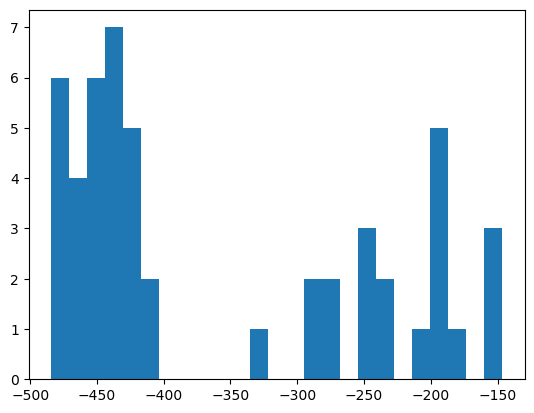

In [105]:
env = gym.make("mypendu1", render_mode = None,start = [1*np.pi/4,0.01],end = np.pi/2,g=0)
loss = []
for _ in range(50):
    loss.append(td3.meta_test(env,nshots=1))
plt.hist(loss,bins=25)

In [800]:
# pth = "meta_demo_256_512_256_10.pt"
# torch.save({"tvnet1":td3.tvnet1.state_dict(),
#             "tvnet2":td3.tvnet2.state_dict(),
#             "tpnet":td3.tpnet.state_dict(),
#             "ovnet1":td3.ovnet1.state_dict(),
#             "ovnet2":td3.ovnet2.state_dict(),
#             "opnet":td3.opnet.state_dict()},pth)

In [ ]:
from google.colab import files
files.download("/content/{}".format(pth))

FileNotFoundError: Cannot find file: /content/meta_demo_256_512_256_10.pt

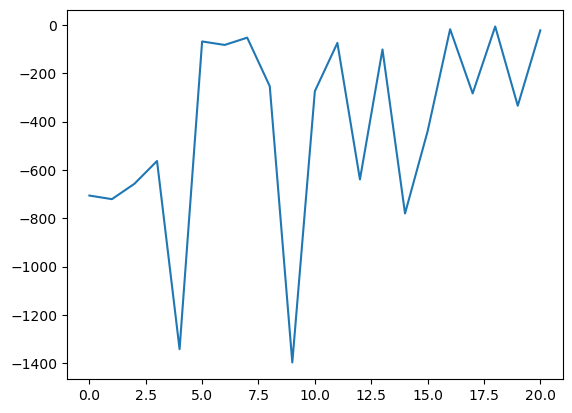

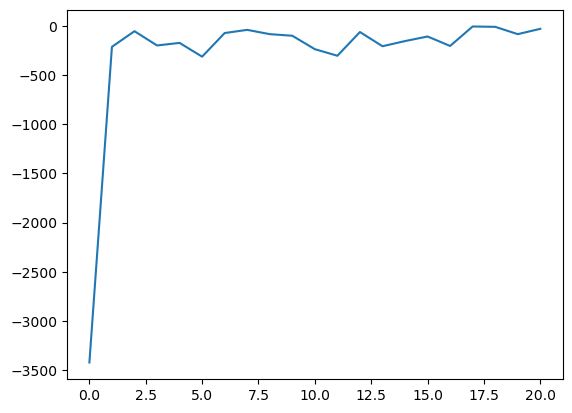

In [59]:
plt.plot(td3.trainRewardsList)
plt.show()
plt.plot(td3.evalRewardsList)

In [ ]:
env = gym.make("mypendu1", render_mode="human",start = [-np.pi/4,0.01],end =0,g=g)
td3.huvaluate(env)

101
-599.5834948643387


In [ ]:
# torch.save({"plotlist":plotlist},'lists_assn4_hc.pt')
# print(plotlist)

In [ ]:
plotlist =torch.load('/content/lists_assn4_hc.pt')['plotlist']
plotQuantity(plotlist,["trainRewardsList", "trainTimeList", "evalRewardsList", "wallClockTimeList","steps"],-1)

# PPO
<a id="PPO"></a>

PPO have quite a few key implementation details.
Please Refer:
"Proximal Policy Optimization Algorithms" [PPO](https://arxiv.org/abs/1707.06347) and
"Implementation Matters in Deep RL: A Case Study on PPO and TRPO" [Implementation Matters](https://openreview.net/forum?id=r1etN1rtPB)

Lets finish things off with an easy implementation of PPO!
A easy way to check you implementation details is running your implementation on some easier environment first and make sure it converges. Like "CartPole-v1" should converge to episodic return of 500 in around 300k steps.

In [ ]:
#All imports here
## Feel free to add or remove

import os
import random
import time

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

In [ ]:
#Hyperparameters
gym_id = "CartPole-v1"  #The id of the gym environment
learning_rate = 0.001
seed = 1
total_timesteps =  #The total timesteps of the experiments
torch_deterministic = True   #If toggled, `torch.backends.cudnn.deterministic=False
cuda = True

num_envs = 4  #The number of parallel game environments (Yes PPO works with vectorized environments)
num_steps = 128 #The number of steps to run in each environment per policy rollout
anneal_lr = True #Toggle learning rate annealing for policy and value networks
gae = True #Use GAE for advantage computation
gamma = 0.99
gae_lambda =  #The lambda for the general advantage estimation
num_minibatches = 4
update_epochs =  #The K epochs to update the policy
norm_adv = True  #Toggles advantages normalization
clip_coef =  #The surrogate clipping coefficient (See what is recommended in the paper!)
clip_vloss = True #Toggles whether or not to use a clipped loss for the value function, as per the paper
ent_coef =  #Coefficient of the entropy
vf_coef =  #Coefficient of the value function
max_grad_norm = 0.5
target_kl = None #The target KL divergence threshold


batch_size = int(num_envs * num_steps)
minibatch_size = int(batch_size // num_minibatches)


In [ ]:
#PPO works with vectorized enviromnets lets make a function that returns a function that returns an environment.
#Refer how to make vectorized environments in gymnasium
def make_env(gym_id, seed):
    return gym.vector.make(gym_id, num_envs=num_envs)


In [ ]:
#We initialize the layers in PPO , refer paper.
#Lets initialize the layers with this function
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    #Initializes the weights and bias of the layers

    return layer


In [ ]:
#Lets make the Main agent class
class Agent(nn.Module):
    def __init__(self, envs):
        super(Agent, self).__init__()
        hidden_dim = 64
        state_dim = envs.
        self.critic = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        #(Returns a single value of the observation)

        self.actor = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh()
        )
        #(Returns the logits of the actions on the observations)


In [ ]:
class Agent(Agent):
        def get_value(self, x):
            # Returns the value from the critic on the observation x
            return self.critic(x)

In [ ]:
class Agent(Agent):
    def get_action_and_value(self, x, action=None):
        #Returns 1.the action (sampled according to the logits),
        #2.log_prob of the action,
        #3.Entropy,
        #4.Value from the critic

        #Your code here
        return


In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = torch_deterministic

device = torch.device("cuda" if torch.cuda.is_available() and cuda else "cpu")


In [ ]:
#Make the vectorized environments, use the helper function that we have declared above
envs = make_env(gym_id,seed)

In [ ]:
agent = Agent(envs).to(device)
optimizer = optim.Adam(agent.parameters(), lr=learning_rate, eps=) #eps is not the default that pytorch uses

# ALGO Logic: Storage setup
obs = torch.zeros((num_steps, num_envs) + envs.single_observation_space.shape).to(device)
actions = torch.zeros((num_steps, num_envs) + envs.single_action_space.shape).to(device)
logprobs = torch.zeros((num_steps, num_envs)).to(device)
rewards = torch.zeros((num_steps, num_envs)).to(device)
dones = torch.zeros((num_steps, num_envs)).to(device)
values = torch.zeros((num_steps, num_envs)).to(device)


In [ ]:
# Start the game
global_step = 0
start_time = time.time()
next_obs, info = envs.reset()
next_obs = torch.Tensor(next_obs).to(device)
next_done = torch.zeros(num_envs).to(device)
num_updates = total_timesteps // batch_size

In [ ]:
#This is the main training loop where we collect the experience ,
#calculate the advantages, ratio , the total loss and learn the policy

for update in range(1, num_updates + 1):

    # Annealing the rate if instructed to do so.
    if anneal_lr:
        # Your code here
        pass

    for step in range(0, num_steps):
        global_step += 1 * num_envs  # We are taking a step in each environment
        obs[step] = next_obs
        dones[step] = next_done

        # ALGO LOGIC: action logic
        with torch.no_grad():
            #Get the action , logprob , _ , value from the agent.

            action, logprob, _, value = # Your code here

            values[step] = value.flatten()
        actions[step] = action
        logprobs[step] = logprob

        # TRY NOT TO MODIFY: execute the game and log data.
        next_obs, reward, done,truncated, info = envs.step(action.cpu().numpy())
        rewards[step] = torch.tensor(reward).to(device).view(-1)
        next_obs, next_done = torch.Tensor(next_obs).to(device), torch.Tensor(done).to(device)

        for item in info:
            if item == "final_info" and info[item][0] is not None:
                print(f"global_step={global_step}, episodic_return={info[item][0]['episode']['r']}")
                break

    # bootstrap value if not done
    with torch.no_grad():
        next_value = agent.get_value(next_obs).reshape(1, -1)
        if gae:
            pass
            # Your code here

            #returns = advantages + values  (yes official implementation of ppo calculates it this way)
        else:

            # Your code here
            pass

            #advantages = returns - values

    # flatten the batch
    b_obs = obs.reshape((-1,) + envs.single_observation_space.shape)
    b_logprobs = logprobs.reshape(-1)
    b_actions = actions.reshape((-1,) + envs.single_action_space.shape)
    b_advantages = advantages.reshape(-1)
    b_returns = returns.reshape(-1)
    b_values = values.reshape(-1)

    # Optimizing the policy and value network
    b_inds = np.arange(batch_size)
    clipfracs = []
    for epoch in range(update_epochs):
        #Get a random sample of batch_size
        np.random.shuffle(b_inds)
        for start in range(0, batch_size, minibatch_size):
            end = start + minibatch_size
            mb_inds = b_inds[start:end]

            #Your code here
            #Calculate the ratio
            _, newlogprob, entropy, newvalue =
            logratio =
            ratio =

            with torch.no_grad():
                # calculate approx_kl http://joschu.net/blog/kl-approx.html
                # Refer the blog for calculating kl in a simpler way
                old_approx_kl =
                approx_kl =
                clipfracs += [((ratio - 1.0).abs() > clip_coef).float().mean().item()]

            mb_advantages = b_advantages[mb_inds]
            if norm_adv:
                mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

            # Policy loss (Calculate the policy loss pg_loss)
            # Your code here


            # Value loss v_loss
            newvalue = newvalue.view(-1)
            if clip_vloss:
                pass
            else:
                pass

            # Entropy loss
            entropy_loss =

            # Total loss
            loss = pg_loss - ent_coef * entropy_loss + v_loss * vf_coef

            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
            optimizer.step()

        if target_kl is not None:
            if approx_kl > target_kl:
                break

    y_pred, y_true = b_values.cpu().numpy(), b_returns.cpu().numpy()
    var_y = np.var(y_true)
    explained_var = np.nan if var_y == 0 else 1 - np.var(y_true - y_pred) / var_y


envs.close()

# Experiments and Plots
<a id="experiments"></a>

Run the DDPG, TD3, PPO on Pendulum, Hopper and Half Cheetah environment respectively.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, you can have multiple plots for each of the below.

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value
For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes
2. Plot mean evaluation rewards vs episodes
3. Plot total steps vs episode
4. Plot train time vs episode
5. Plot wall clock time vs episode
6. Based on plots what are your observations about DDPG and TD3, compare the two algorithms.
7. What is the advatage of PPO over DDPG or TD3?

In [ ]:
loss_fn = nn.MSELoss()
def runDeepAgents(env):
    # this function will initialize 5 different instances of the env (using different seeds), run all the agents
    # over these different instances. Collects results and generate the plots state above.
    # generate your plots in the cells below
    # write the answers to part 11, 12 and 13 in the cells below the plot-cells.
    lllist = []
    # env = gym.make("Hopper-v4")
    # env = gym.make("Pendulum-v1")
    # env = gym.make("HalfCheetah-v4")
    tep=500
    llist = []

    for seed in seeds:
        agent = DDPG(env,seed,0.99,0.005,100000,128,[256,128],1,'adam','adam',0.001,0.001,20,1,_)
        infolist = agent.runDDPG()
        llist.append(infolist)
    lllist.append(llist)
    llist = []
    for seed in seeds:
        agent = TD3(env,seed,0.99,0.005,100000,128,[256,128],1,1,2,'adam','adam',0.001,0.001,20,1,_)
        infolist = agent.runTD3()
        llist.append(infolist)
    lllist.append(llist)
    return lllist


In [ ]:
env = gym.make("Hopper-v4")
plotlist = runDeepAgents(env)
plotQuantity(plotlist,["trainRewardsList", "trainTimeList", "evalRewardsList", "wallClockTimeList","steps"],-1)


In [ ]:
env = gym.make("Pendulum-v1")
plotlist = runDeepAgents(env)
plotQuantity(plotlist,["trainRewardsList", "trainTimeList", "evalRewardsList", "wallClockTimeList","steps"],-1)


In [ ]:
env = gym.make("HalfCheetah-v4")
plotlist = runDeepAgents(env)
plotQuantity(plotlist,["trainRewardsList", "trainTimeList", "evalRewardsList", "wallClockTimeList","steps"],-1)


In [ ]:
"""
Q6
Based on the above plots, we can see that TD3 performs slilghtly better in terms of faster convergence, less variance and better rewards for most of the environments.
"""

In [ ]:
"""
PPO algorithm can be run with vectorized environments which means it can make use of resources like GPUs and it significantly decreases the training time for the algorithm.
Although I wasn't able to code the PPO algorithm properlt due to many errors, I have tried it using code from ChatGPT.
"""

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(ActorCritic, self).__init__()
        self.actor = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh()  # For bounded continuous actions
        )
        self.critic = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, state):
        action_mean = self.actor(state)
        value = self.critic(state)
        return action_mean, value

class PPOAgent:
    def __init__(self, state_dim, action_dim, lr=0.001, gamma=0.99, clip_ratio=0.2, value_coeff=0.5, entropy_coeff=0.01):
        self.actor_critic = ActorCritic(state_dim, action_dim)
        self.optimizer = optim.Adam(self.actor_critic.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_ratio = clip_ratio
        self.value_coeff = value_coeff
        self.entropy_coeff = entropy_coeff

    def get_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            action_mean, _ = self.actor_critic(state)
            action = action_mean.squeeze(0).numpy()
        return action

    def compute_advantages(self, rewards, dones, values, next_values):
        deltas = rewards + self.gamma * next_values * (1 - dones) - values
        print(deltas.shape)
        advantages = torch.zeros(deltas.shape)
        advantage = 0
        for t in reversed(range(len(deltas))):
            advantage = deltas[t] + self.gamma * advantage * (1 - dones[t])
            advantages[t] = advantage.detach()
        return advantages

    def ppo_loss(self, states, actions, rewards, dones, next_states, old_action_probs, old_values):
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)
        next_states = torch.FloatTensor(next_states)

        # Compute advantages
        values = self.actor_critic.critic(states)
        next_values = self.actor_critic.critic(next_states)
        advantages = self.compute_advantages(rewards, dones, values, next_values)
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Compute critic loss
        target_values = rewards + self.gamma * next_values * (1 - dones)
        critic_loss = F.mse_loss(values, target_values.detach())

        # Compute actor loss
        action_mean, _ = self.actor_critic(states)
        new_action_probs = self._gaussian_likelihood(actions, action_mean)
        old_action_probs = torch.FloatTensor(old_action_probs)
        ratios = new_action_probs / (old_action_probs + 1e-8)
        print(type(advantages))
        surr1 = ratios *advantages
        surr2 = torch.clamp(ratios, 1 - self.clip_ratio, 1 + self.clip_ratio) * advantages
        actor_loss = -torch.mean(torch.min(surr1, surr2))

        # Total loss
        loss = actor_loss + self.value_coeff * critic_loss

        return loss

    def train(self, states, actions, rewards, dones, next_states, old_action_probs, old_values):
        self.optimizer.zero_grad()
        loss = self.ppo_loss(states, actions, rewards, dones, next_states, old_action_probs, old_values)
        loss.backward()
        self.optimizer.step()

    def _gaussian_likelihood(self, action, mean):
        std = 0.1  # Fixed standard deviation for simplicity
        var = std**2
        action_dim = action.size(-1)
        log_std = torch.log(torch.tensor(std, dtype=torch.float32))
        log_prob = -0.5 * (((action - mean) / (var + 1e-8)) ** 2 + 2 * log_std + np.log(2 * np.pi))
        return log_prob.sum(dim=-1)

# Example usage:
# Replace envs with your own environment
envs =gym.make("Hopper-v4") # Replace None with your environment

# Define hyperparameters
state_dim = envs.observation_space.shape[0]
action_dim = envs.action_space.shape[0]
lr = 0.001
gamma = 0.99
clip_ratio = 0.2
value_coeff = 0.5
entropy_coeff = 0.01

# Initialize PPO agent
agent = PPOAgent(state_dim, action_dim, lr, gamma, clip_ratio, value_coeff, entropy_coeff)

# Training loop
num_updates = 100  # Number of updates
num_steps = 100  # Number of steps per update
batch_size = 64  # Batch size for training
for update in tqdm(range(num_updates)):
    # Lists to store experience
    all_states = []
    all_actions = []
    all_rewards = []
    all_dones = []
    all_next_states = []
    all_old_action_probs = []
    all_old_values = []

    for step in range(num_steps):
        # Collect experience
        state,_ = envs.reset()
        done = False
        trunc = False
        rew = 0
        while not (done or trunc):
            # Get action from the agent
            action = agent.get_action(state)

            # Take a step in the environment
            next_state, reward, done, trunc,_ = envs.step(action)

            # Log data
            rew+=reward
            all_states.append(state)
            all_actions.append(action)
            all_rewards.append(reward)
            all_dones.append(done)
            all_next_states.append(next_state)

            # Compute old action probabilities and values
            with torch.no_grad():
                action_mean, _ = agent.actor_critic(torch.FloatTensor(state))
                old_action_prob = agent._gaussian_likelihood(torch.FloatTensor(action), action_mean)
                all_old_action_probs.append(old_action_prob)
                all_old_values.append(agent.actor_critic.critic(torch.FloatTensor(state)).item())

            # Update state
            state = next_state
        print(rew)
    # Perform updates
    agent.train(all_states, all_actions, all_rewards, all_dones, all_next_states, all_old_action_probs, all_old_values)

# Close the environment
envs.close()
